In [10]:
import warnings
from pathlib import Path

import numpy as np
import pytorch_lightning as pl
import torch
from matplotlib import pyplot as plt
from pytorch_lightning import loggers as pl_loggers

from zprp.models.gatys.data import GatysDataModule
from zprp.models.gatys.model import GatysNST

In [11]:
LOG_PATH = "lightning_logs"
LOG_NAME = "gatys_basic"
DATA_PATH = Path("../data/gatys")

In [12]:
torch.set_float32_matmul_precision("high")

In [13]:
# lightning complaining about using only one worker in DataLoader
warnings.filterwarnings("ignore", ".*does not have many workers.*")

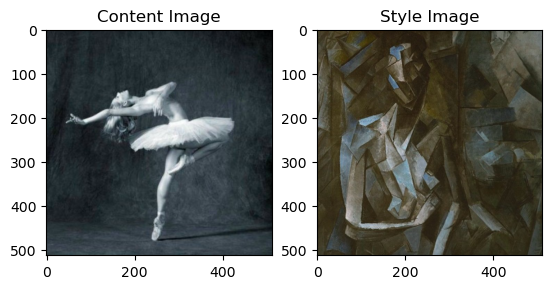

In [14]:
img_size = 512

dm = GatysDataModule(
    content_path=DATA_PATH / "content/dancing.jpg", style_path=DATA_PATH / "style/picasso.jpg", img_size=img_size
)
dm.setup("fit")

content_img, style_img = dm.train[0]
fix, axes = plt.subplots(1, 2)

axes[0].imshow(np.transpose(content_img, axes=(1, 2, 0)))
axes[0].set_title("Content Image")
axes[1].imshow(np.transpose(style_img, axes=(1, 2, 0)))
axes[1].set_title("Style Image")
plt.show()

In [15]:
epochs = 100
tb_logger = pl_loggers.TensorBoardLogger(save_dir=LOG_PATH, name=LOG_NAME)

model = GatysNST(
    content_img=content_img, style_img=style_img, content_style_weights=(1e-5, 1e4), log_img_every_n_epochs=10
)


trainer = pl.Trainer(
    max_epochs=epochs, logger=tb_logger, enable_progress_bar=False, enable_checkpointing=False, log_every_n_steps=1
)
trainer.fit(model, dm)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: lightning_logs/gatys_basic
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type                     | Params
----------------------------------------------------------
0 | extractor    | VGG19FeatureMapExtractor | 20.0 M
1 | loss         | GatysNSTLoss             | 0     
  | other params | n/a                      | 786 K 
----------------------------------------------------------
786 K     Trainable params
20.0 M    Non-trainable params
20.8 M    Total params
83.243    Total estimated model params size (MB)
`Trainer.fit` stopped: `max_epochs=100` reached.


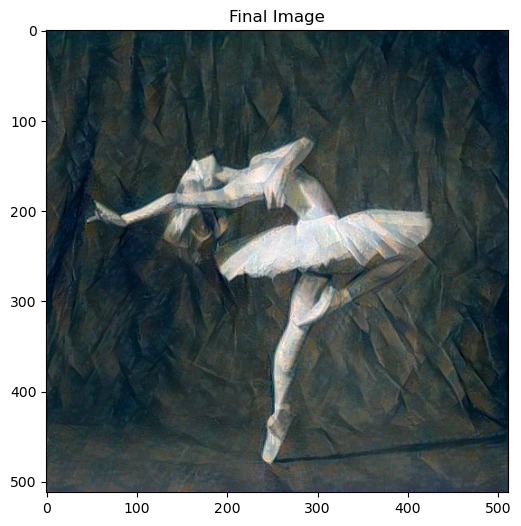

In [16]:
final_img = model.image.detach().cpu().numpy()
plt.figure(figsize=(12, 6))
plt.imshow(np.transpose(final_img, axes=(1, 2, 0))[:, :, ::-1])
plt.title("Final Image")
plt.show()